# 13_Phase 4 Analysis on Test Set (Stage 1 Test)

Written by: Rupesh Kumar Dey

Models from Stage 1 Development are tested on Set 1 - 5 Test Set

Notebook used for model testing on validation set Phase 4.

## Importing required Libraries

In [9]:
!pip install tensorflow_hub
!pip install seaborn

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [10]:
# Importing python Libraries
# General / plotting libraries
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Image Libraries
from PIL import Image

# File System Libraries
import os
import sys
import copy
from copy import deepcopy

# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, metrics, callbacks
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from HelperFunctions import *

In [11]:
# Setting project parent directory path 
projectPath = "/notebooks"

## Model Validation (Stage 1 Models Phase 4 Analysis Test Set)

#### Dataset Loading 

### 13_BaseModel1_CLAHE: Base Model 1 with Image Processing CLAHE (Phase 4)

#### Dataset Loading 

In [12]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetNormalization/test"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (100,100))

Found 16800 images belonging to 4 classes.
Found 4800 images belonging to 4 classes.
Found 4800 images belonging to 4 classes.


#### Loading Checkpoint & Prediction & Results

2022-08-31 16:11:32.802459: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


4800/4800 [==============================] - 49s 10ms/step
Confusion Matrix:


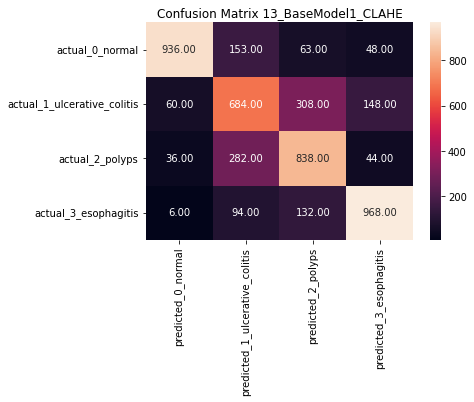

In [13]:
# Load best model from checkpoint folder
BaseModel1_CLAHE = createBaseModel(optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResults/01_BaseModel1_CLAHE/checkpoint/01_BaseModel1_CLAHE.ckpt"
loadModel(BaseModel1_CLAHE,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(BaseModel1_CLAHE, test_data, "13_BaseModel1_CLAHE" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TestResults/13_BaseModel1_CLAHE/results/confusionMatrix/13_BaseModel1_CLAHE_TEST.jpg")
saveResults_csv(df_results,"TestResults/13_BaseModel1_CLAHE/results/classificationReport/13_BaseModel1_CLAHE_TEST.csv")

### 13_BaseModel2_MULTISCALE_tunedAdamLrScheduler: Base Model 2 with Image Processing MULTISCALE (Optimizer - Adam + LrScheduler) (Phase 4)

#### Dataset Loading 

In [14]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetNormalization/test"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 4800 images belonging to 4 classes.
Found 4800 images belonging to 4 classes.


#### Loading Checkpoint & Prediction & Results

4800/4800 [==============================] - 33s 7ms/step
Confusion Matrix:


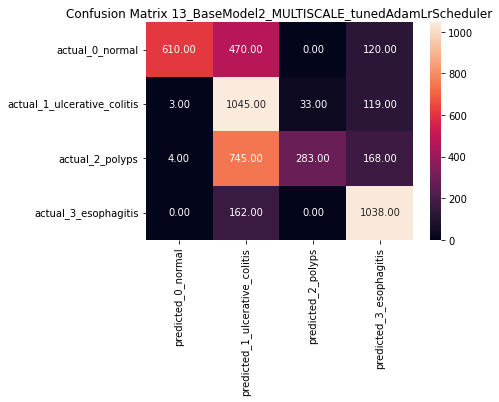

In [15]:
# Load best model from checkpoint folder
BaseModel2_MULTISCALE_tunedAdamLrScheduler = createBaseModel2(optimizer = tf.keras.optimizers.Adam())
checkpointPath = "TrainedResults/02_BaseModel2_MULTISCALE_tunedAdamLrScheduler/checkpoint/02_BaseModel2_MULTISCALE_tunedAdamLrScheduler.ckpt"
loadModel(BaseModel2_MULTISCALE_tunedAdamLrScheduler,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(BaseModel2_MULTISCALE_tunedAdamLrScheduler, test_data, "13_BaseModel2_MULTISCALE_tunedAdamLrScheduler" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TestResults/13_BaseModel2_MULTISCALE_tunedAdamLrScheduler/results/confusionMatrix/13_BaseModel2_MULTISCALE_tunedAdamLrScheduler_TEST.jpg")
saveResults_csv(df_results,"TestResults/13_BaseModel2_MULTISCALE_tunedAdamLrScheduler/results/classificationReport/13_BaseModel2_MULTISCALE_tunedAdamLrScheduler_TEST.csv")

### 13_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdam: Transfer Learning with ResNet50V1 model on MULTISCALE Image (Optimizer - Adam + LrScheduler) (Phase 4)

#### Dataset Loading 

In [16]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetNormalization/test"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 4800 images belonging to 4 classes.
Found 4800 images belonging to 4 classes.


#### Loading Checkpoint & Prediction & Results

4800/4800 [==============================] - 60s 12ms/step
Confusion Matrix:


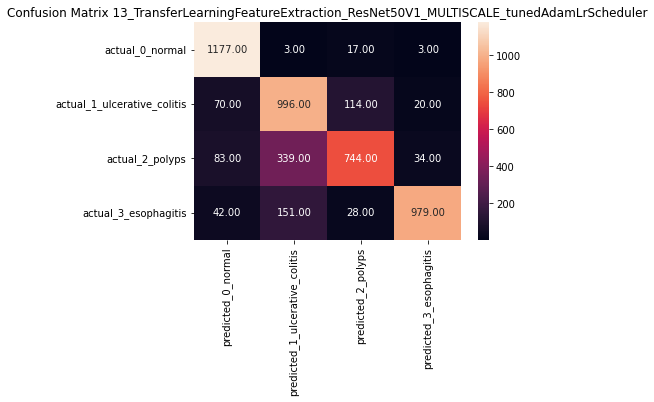

In [17]:
# Load best model from checkpoint folder
baseModel = tf.keras.applications.resnet50.ResNet50(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
checkpointPath = "TrainedResults/03_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler/checkpoint/03_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler.ckpt"
loadModel(TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler, test_data, "13_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TestResults/13_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler/results/confusionMatrix/13_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler_TEST.jpg")
saveResults_csv(df_results,"TestResults/13_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler/results/classificationReport/13_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler_TEST.csv")

### 13_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdam: Transfer Learning with ResNet50V2 model on NORMAL Image (Optimizer - Adam + LrScheduler) (Phase 4)

In [18]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetNormalization/test"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 4800 images belonging to 4 classes.
Found 4800 images belonging to 4 classes.


#### Loading Checkpoint & Prediction & Results

4800/4800 [==============================] - 58s 12ms/step
Confusion Matrix:


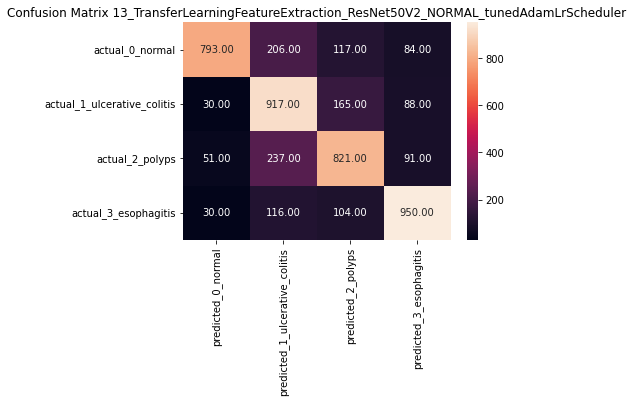

In [19]:
baseModel = tf.keras.applications.resnet_v2.ResNet50V2(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
checkpointPath = "TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler/checkpoint/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler.ckpt"
loadModel(TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler, test_data, "13_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TestResults/13_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler/results/confusionMatrix/13_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler_TEST.jpg")
saveResults_csv(df_results,"TestResults/13_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler/results/classificationReport/13_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler_TEST.csv")

### 13_TransferLearningFeatureExtraction_MobileNetV1_NORMAL: Transfer Learning with MobileNetV1 model on NORMAL Image (Optimizer - Adam + LrScheduler) (Phase 4)

#### Dataset Loading 

In [20]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetNormalization/test"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 4800 images belonging to 4 classes.
Found 4800 images belonging to 4 classes.


#### Loading Checkpoint & Prediction & Results

4800/4800 [==============================] - 41s 8ms/step
Confusion Matrix:


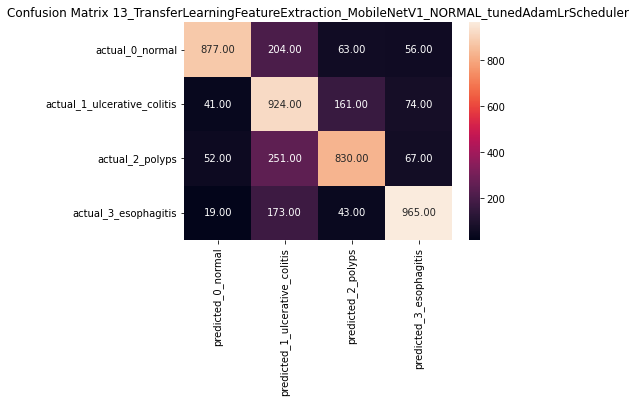

In [21]:
baseModel = tf.keras.applications.mobilenet.MobileNet(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
checkpointPath = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler/checkpoint/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler.ckpt"
loadModel(TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler, test_data, "13_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TestResults/13_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler/results/confusionMatrix/13_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler_TEST.jpg")
saveResults_csv(df_results,"TestResults/13_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler/results/classificationReport/13_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler_TEST.csv")

### 13_TransferLearningFeatureExtraction_MobileNetV2_CLAHE: Transfer Learning with MobileNetV2 model on CLAHE Image (Optimizer - Adam + LrScheduler) (Phase 4)

#### Dataset Loading 

In [22]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetNormalization/test"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 4800 images belonging to 4 classes.
Found 4800 images belonging to 4 classes.


#### Loading Checkpoint & Prediction & Results

4800/4800 [==============================] - 51s 10ms/step
Confusion Matrix:


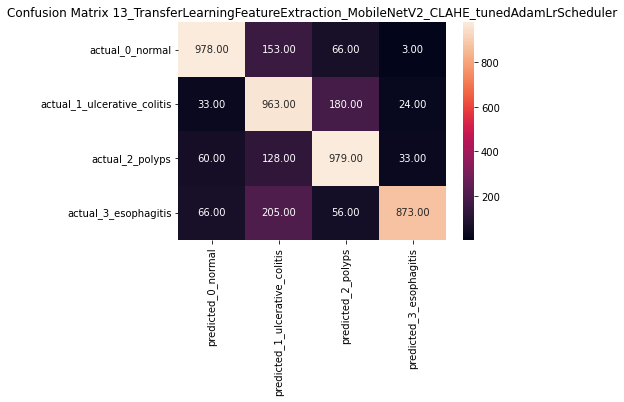

In [23]:
# Load best model from checkpoint folder
baseModel = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
checkpointPath = "TrainedResults/06_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler/checkpoint/06_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler.ckpt"

loadModel(TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler, test_data, "13_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TestResults/13_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler/results/confusionMatrix/13_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler_TEST.jpg")
saveResults_csv(df_results,"TestResults/13_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler/results/classificationReport/13_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler_TEST.csv")


### 13_TransferLearningFineTuning_ResNet50V1_CLAHE: Transfer Learning with ResNet50V1 model on CLAHE Image (Optimizer - Adam + LrScheduler) (Phase 4)

#### Dataset Loading 

In [24]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetNormalization/test"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 4800 images belonging to 4 classes.
Found 4800 images belonging to 4 classes.


#### Loading Checkpoint & Prediction & Results

4800/4800 [==============================] - 62s 13ms/step
Confusion Matrix:


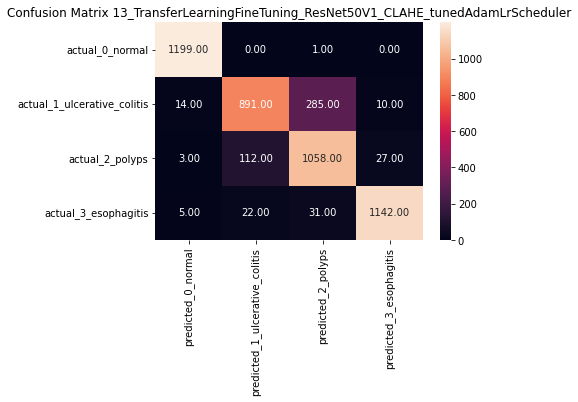

In [25]:
# Load best model from checkpoint folder
baseModel = tf.keras.applications.resnet50.ResNet50(include_top = True, weights = "imagenet")
TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler = createApplicationsFineTuningModel(baseModel, trainable = True, numLayersUnfreeze = 34 ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
checkpointPath = "TrainedResults/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler/checkpoint/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler.ckpt"
loadModel(TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler, test_data, "13_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TestResults/13_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler/results/confusionMatrix/13_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler_TEST.jpg")
saveResults_csv(df_results,"TestResults/13_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler/results/classificationReport/13_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler_TEST.csv")

### 13_TransferLearningFineTuning_ResNet50V2_RAYLEIGH: Transfer Learning with ResNet50V2 model on RAYLEIGH Image (Phase 4)

#### Dataset Loading 

In [26]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetNormalization/test"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 4800 images belonging to 4 classes.
Found 4800 images belonging to 4 classes.


#### Loading Checkpoint & Prediction & Results

4800/4800 [==============================] - 58s 12ms/step
Confusion Matrix:


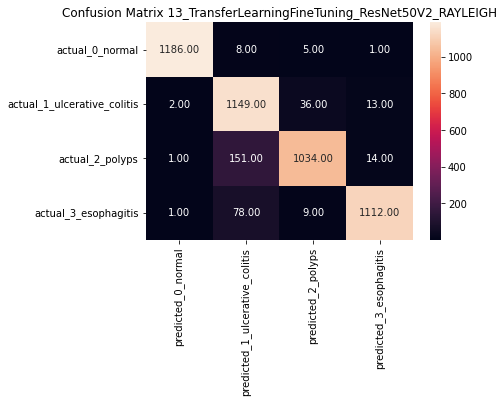

In [27]:
# Load best model from checkpoint folder
baseModel = tf.keras.applications.resnet_v2.ResNet50V2(include_top = True, weights = "imagenet")
TransferLearningFineTuning_ResNet50V2_RAYLEIGH = createApplicationsFineTuningModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResults/08_TransferLearningFineTuning_ResNet50V2_RAYLEIGH/checkpoint/08_TransferLearningFineTuning_ResNet50V2_RAYLEIGH.ckpt"
loadModel(TransferLearningFineTuning_ResNet50V2_RAYLEIGH,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFineTuning_ResNet50V2_RAYLEIGH, test_data, "13_TransferLearningFineTuning_ResNet50V2_RAYLEIGH" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TestResults/13_TransferLearningFineTuning_ResNet50V2_RAYLEIGH/results/confusionMatrix/13_TransferLearningFineTuning_ResNet50V2_RAYLEIGH_TEST.jpg")
saveResults_csv(df_results,"TestResults/13_TransferLearningFineTuning_ResNet50V2_RAYLEIGH/results/classificationReport/13_TransferLearningFineTuning_ResNet50V2_RAYLEIGH_TEST.csv")

### 13_TransferLearningFineTuning_MobileNetV1_NORMAL: Transfer Learning with MobileNetV1 model on NORMAL Image (Phase 4)

#### Dataset Loading 

In [28]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetNormalization/test"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 4800 images belonging to 4 classes.
Found 4800 images belonging to 4 classes.


#### Loading Checkpoint & Prediction & Results

4800/4800 [==============================] - 39s 8ms/step
Confusion Matrix:


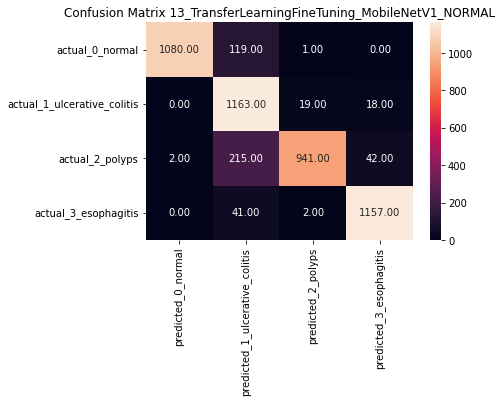

In [29]:
# Load best model from checkpoint folder
baseModel = tf.keras.applications.mobilenet.MobileNet(include_top = True, weights = "imagenet")
TransferLearningFineTuning_MobileNetV1_NORMAL = createApplicationsFineTuningModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResults/09_TransferLearningFineTuning_MobileNetV1_NORMAL/checkpoint/09_TransferLearningFineTuning_MobileNetV1_NORMAL.ckpt"
loadModel(TransferLearningFineTuning_MobileNetV1_NORMAL,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFineTuning_MobileNetV1_NORMAL, test_data, "13_TransferLearningFineTuning_MobileNetV1_NORMAL" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TestResults/13_TransferLearningFineTuning_MobileNetV1_NORMAL/results/confusionMatrix/13_TransferLearningFineTuning_MobileNetV1_NORMAL_TEST.jpg")
saveResults_csv(df_results,"TestResults/13_TransferLearningFineTuning_MobileNetV1_NORMAL/results/classificationReport/13_TransferLearningFineTuning_MobileNetV1_NORMAL_TEST.csv")

### 13_TransferLearningFineTuning_MobileNetV2_NORMAL: Transfer Learning with MobileNetV2 model on NORMAL Image (Phase 4)

#### Loading Checkpoint & Prediction & Results

4800/4800 [==============================] - 51s 10ms/step
Confusion Matrix:


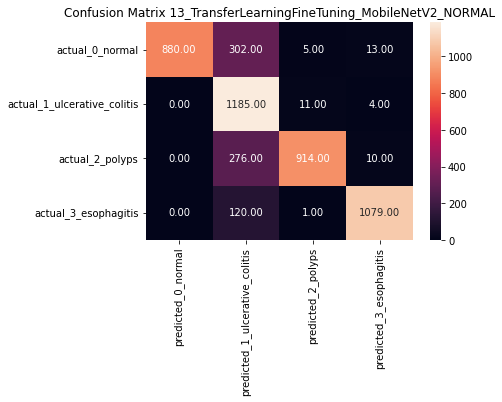

In [30]:
# Load best model from checkpoint folder
baseModel = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top = True, weights = "imagenet")
TransferLearningFineTuning_MobileNetV2_NORMAL = createApplicationsFineTuningModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResults/10_TransferLearningFineTuning_MobileNetV2_NORMAL/checkpoint/10_TransferLearningFineTuning_MobileNetV2_NORMAL.ckpt"
loadModel(TransferLearningFineTuning_MobileNetV2_NORMAL,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFineTuning_MobileNetV2_NORMAL, test_data, "13_TransferLearningFineTuning_MobileNetV2_NORMAL" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TestResults/13_TransferLearningFineTuning_MobileNetV2_NORMAL/results/confusionMatrix/13_TransferLearningFineTuning_MobileNetV2_NORMAL_TEST.jpg")
saveResults_csv(df_results,"TestResults/13_TransferLearningFineTuning_MobileNetV2_NORMAL/results/classificationReport/13_TransferLearningFineTuning_MobileNetV2_NORMAL_TEST.csv")